# https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [26]:
# Importowanie niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

# Wczytanie danych
data = pd.read_csv("./Dane/train.csv")

# Eksploracja danych
print(data.shape)
print(data.head())
print(data.describe())

(2000, 21)
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  w

Epoch 1/10
40/40 [==============================] - 0s 3ms/step - loss: 1.3258 - accuracy: 0.3641 - val_loss: 1.1899 - val_accuracy: 0.5000
Epoch 2/10
40/40 [==============================] - 0s 1ms/step - loss: 1.0253 - accuracy: 0.5992 - val_loss: 0.9420 - val_accuracy: 0.6187
Epoch 3/10
40/40 [==============================] - 0s 1ms/step - loss: 0.7669 - accuracy: 0.7250 - val_loss: 0.7317 - val_accuracy: 0.7375
Epoch 4/10
40/40 [==============================] - 0s 1ms/step - loss: 0.5836 - accuracy: 0.8289 - val_loss: 0.5909 - val_accuracy: 0.7844
Epoch 5/10
40/40 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.8703 - val_loss: 0.4818 - val_accuracy: 0.8219
Epoch 6/10
40/40 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.9062 - val_loss: 0.4090 - val_accuracy: 0.8656
Epoch 7/10
40/40 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.9320 - val_loss: 0.3555 - val_accuracy: 0.8719
Epoch 8/10
40/40 [==

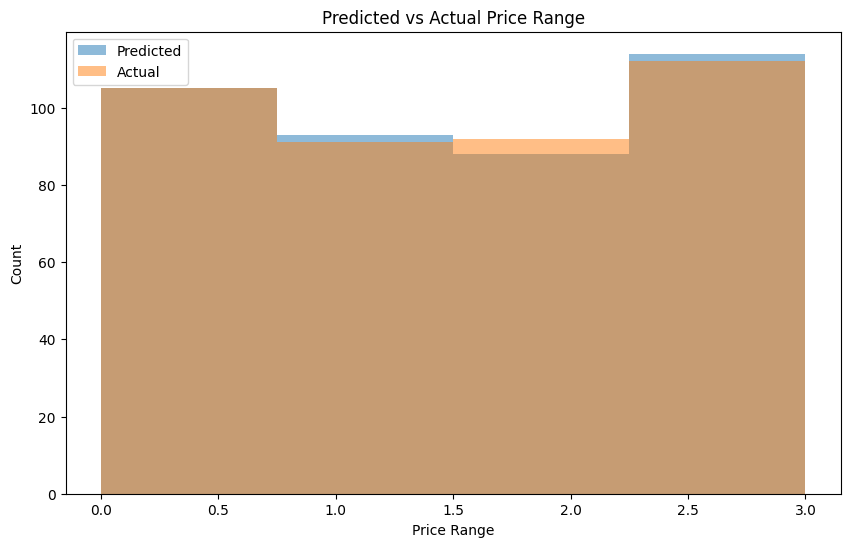

In [27]:
# Przetwarzanie danych
X = data.drop("price_range", axis=1)  # Wejścia (cechy)
y = data["price_range"]  # Wyjścia (klasy)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konwertowanie danych do postaci tensorów
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Tworzenie modelu - sieć neuronowa
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax") # 4 neurony w warstwie wyjściowej
])

# Kompilacja modelu z wykorzystaniem funkcji straty, optymalizatorem Adam i metryką accuracy do oceny skuteczności modelu
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Trening modelu
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Ewaluacja modelu
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=4, alpha=0.5, label="Predicted")
plt.hist(y_test, bins=4, alpha=0.5, label="Actual")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.title("Predicted vs Actual Price Range")
plt.legend()
plt.show()